# Previsão de AVC com Random Forest e XGBoost usando SMOTE


Este notebook realiza uma análise comparativa entre dois dos melhores modelos para dados tabulares aplicando SMOTE para balancear o dataset.:

- **Random Forest Classifier**
- **XGBoost Classifier**

O objetivo é prever se um paciente terá um AVC com base em características demográficas e clínicas.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [2]:
!pip install imblearn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Carregando o dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.drop(columns=["id"], inplace=True)
df["bmi"] = SimpleImputer(strategy="mean").fit_transform(df[["bmi"]])

# Codificação de variáveis categóricas
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

# Separação de variáveis
X = df.drop(columns=["stroke"])
y = df["stroke"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_test_scaled)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42)
xgb_model.fit(X_resampled, y_resampled)
xgb_preds = xgb_model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:16:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Random Forest com SMOTE")
print(classification_report(y_test, rf_preds))

print("XGBoost com SMOTE")
print(classification_report(y_test, xgb_preds))

Random Forest com SMOTE
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.92      0.92      0.92      1022

XGBoost com SMOTE
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.19      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.57      0.55      0.56      1022
weighted avg       0.92      0.93      0.92      1022



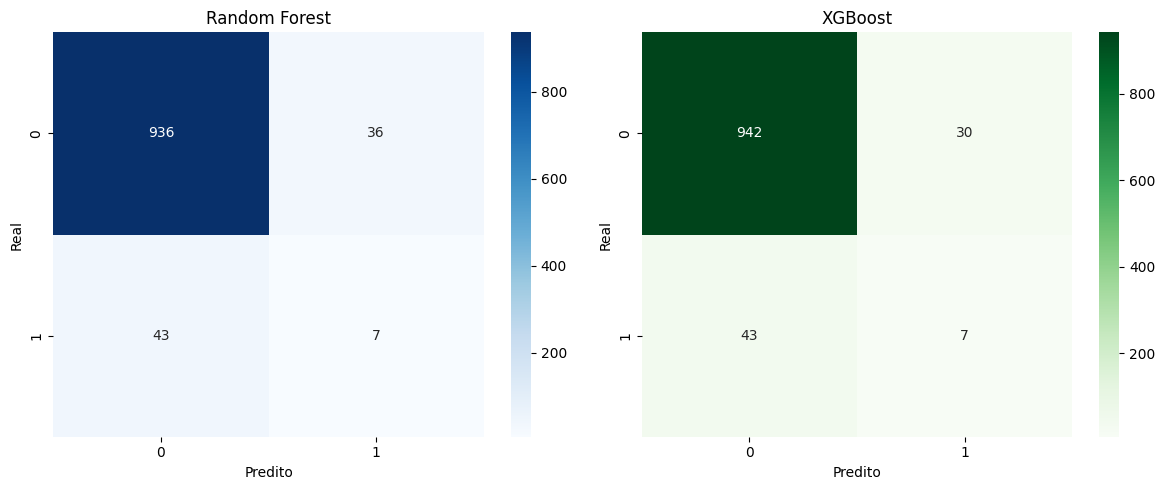

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Random Forest")
axs[0].set_xlabel("Predito")
axs[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title("XGBoost")
axs[1].set_xlabel("Predito")
axs[1].set_ylabel("Real")
plt.tight_layout()
plt.show()